In [1]:
## ************ Importation des libraries ******************
import pandas as pd ##une librarie d'analyse et manipulation de données
import numpy as np ##librairie destinée à l'analyse et manipulation des matrices et des tableaux multidimentionnels
import matplotlib.pyplot as plt ## librarie pour la représentation graphique 
import math
## la librairie de sklearn est destinée à l'apprentissage automatique 
from sklearn.model_selection import train_test_split ##ceci est pour la division du dataset en un training set et un testing set
from sklearn.linear_model import LinearRegression
from sklearn import metrics ## les différents metriques qu'on va utiliser pour mesurer la performance de notre modèle
import joblib  ##librarie pour la transformation des modèles en des fichiers .pkl pour les exploiter dans le site web

In [2]:
#Lecture du dataset en dataframe
df = pd.read_csv('df_linreg.csv')
df = df.drop(df.columns[0],axis=1)

In [3]:
#garder juste les features qu'on va se baser sur pour faire notre prédictions
df = df[['failures', 'absences', 'schoolsup', 'Mjob', 'reason', 'guardian','paid', 'Fedu', 'goout', 'studytime','traveltime','G1','G3']]
df

,failures,absences,schoolsup,Mjob,reason,guardian,paid,Fedu,goout,studytime,traveltime,G1,G3
0,0,6,1,0,0,0,0,4,4,2,2,5,6
1,0,4,0,0,0,1,0,1,3,2,1,5,6
2,3,10,1,0,3,0,1,1,2,2,1,7,10
3,0,2,0,3,1,0,1,2,2,3,1,15,15
4,0,4,0,4,1,1,1,3,2,2,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,11,0,1,0,2,1,2,4,2,1,9,9
391,0,3,0,1,0,0,0,1,5,1,2,14,16
392,3,3,0,4,0,2,0,1,3,1,1,10,7
393,0,0,0,1,0,0,0,2,1,1,3,11,10


In [4]:
# division des features et de target 
X= df.drop(["G3"], axis=1)
y= df["G3"]

In [5]:
#division du dataset en un training set et un testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
## application de la régression linéraire
model = LinearRegression()
## training du modèle
model.fit(X_train, y_train)

LinearRegression()

In [6]:
#prediction sur X_test
predicted = model.predict(X_test)
#utilisation des differentes métriques pour la mesurer la performance du modèle
print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print("R squared :", metrics.r2_score(y_test, predicted))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MSE : 8.651055299723192
R squared : 0.6864292659768592
2.9412676348342037


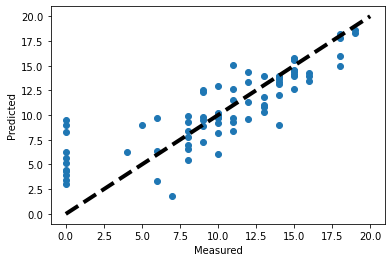

In [7]:
## graphe pour montrer la difference entre les valeurs attendus et les valeurss predicted 
fig, ax = plt.subplots()
ax.scatter(y_test,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Saving the model

In [8]:
linreg_file = "Models2/linreg_model2.pkl"
joblib.dump(model, linreg_file)

['Models2/linreg_model2.pkl']